<a href="https://colab.research.google.com/github/AnnikaStephens/Portfolio/blob/main/asset_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asset Management
---



In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import cvxpy as cp

## Introduction to Portfolio Analysis
---

Portfolio = a collection of assets that the investor holds

**Types of assets:** stocks, bonds, (crypto)currencies, real estate ...

### Questions to be answered

+ How much we must invest our money in each asset?
+ What is the best way to form a suitable portfolio?

### But you need to understand some math formulae ...

The return on a portfolio of asset is a weighted average of the return on the individual assets.

$$
 R_P = \sum_{n=1}^N w_nR_n.
$$

+ $R_P$: the return on the portfolio
+ $R_n$: the return on the $n$-th asset
+ $w_n$: the fraction of the funds invested in the $n$-th asset

The <font color=red>expected return</font> is defined as

\begin{align*}
 \mu_P &= \mathrm{E}(R_P) = \mathrm{E}\left(\sum_{n=1}^N w_nR_n\right) \\
  &= \sum_{n=1}^N w_n\mathrm{E}(R_n) = \sum_{n=1}^N w_n\mu_n.
\end{align*}

The <font color=red>variance</font> is defined as

\begin{align*}
 \sigma_P^2 &= \mathrm{E}[(R_P-\mu_P)^2]
  =\mathrm{E}\left[\left\{\sum_{n=1}^N w_n(R_n-\mu_n)\right\}^2\right] \\
  &=\sum_{n=1}^N w_n^2\mathrm{E}[(R_n-\mu_n)^2]
  +\sum_{n=1}^N\sum_{m\ne n}^N w_nw_m\mathrm{E}[(R_n-\mu_n)(R_m-\mu_m)] \\
  &= \sum_{n=1}^N w_n^2\sigma_n^2 + \sum_{n=1}^N\sum_{m\ne n}^N w_nw_m\sigma_{nm}.
\end{align*}

Using vectors and matrices, the above complicated formulae can be simplified as

\begin{align*}
 \mu_P &= w^{\intercal}\mu,\quad \sigma_P^2 = w^{\intercal}\Sigma w,
\end{align*}

where

$$
 w = \begin{bmatrix} w_1 \\ \vdots \\ w_N \end{bmatrix}, \quad 
 \mu = \begin{bmatrix} \mu_1 \\ \vdots \\ \mu_N \end{bmatrix}, \quad 
 \Sigma = \begin{bmatrix} \sigma_1^2 & \cdots & \sigma_{1N} \\
 \vdots & \ddots & \vdots \\
 \sigma_{N1} & \cdots & \sigma_N^2 \\
 \end{bmatrix}.
$$

$\mu$ and $\Sigma$ are called the <font color=red>mean vector</font> and the <font color=red>covariance matrix</font> respectively.


## Example: Portfolio of Two Assets
---

The expected return on a portfolio of two assets is

$$
 \mu_P = w_1\mu_1 + w_2\mu_2,
$$

and the variance is

\begin{align*}
 \sigma_P^2 
 &= w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{12} \\
 &= w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{12}\sigma_1\sigma_2,
\end{align*}

where $\sigma_{12}=\rho_{12}\sigma_1\sigma_2$ and $\rho_{12}$ is the correlation coefficient between $R_1$ and $R_2$. The correlation coefficient affects the variance of portfolio returns.

The following cell computes expected returns and variances of portfolios with

$$
\mu_1 = 1.0,\ \mu_2 = 8.0,\ \sigma_1 = 1.0,\ \sigma_2 = 3.0,\ \rho_{12}\in\{0.8, 0.0, -0.8, -1.0\},
$$

and store them in `V_Return` and `V_Risk` respectively.

`array` is a NumPy function to create n-dimensional array (vector, matrix, tensor).

`linspace(starting value, ending value, number of points)` creates a vector of grid points.

`zeros` is a NumPy function to create an array whose elemets are all equal to zero.

*Cf.* `ones` creates an array whose elements are all equal to one while `empty` creates an array whose elements are filled with unspecified numbers.

`enumerate` returns two values:

+ the second one is an element in an array/list/tuple
+ the first one is the corresponding index of each element


In [ ]:
Mu = np.array([1.0, 8.0])
Sigma = np.array([1.0, 3.0])
V_Rho = np.array([0.8, 0.0, -0.8, -1.0])
V_Weight = np.linspace(0.0, 1.0, 101)
V_Return = np.zeros((V_Rho.size, V_Weight.size))
V_Risk = np.zeros((V_Rho.size, V_Weight.size))
for idx1, Rho in enumerate(V_Rho):
    for idx2, W in enumerate(V_Weight):
        V_Return[idx1, idx2] = W * Mu[0] + (1.0 - W) * Mu[1]
        V_Risk[idx1, idx2] = (W * Sigma[0])**2 + ((1.0 - W) * Sigma[1])**2 \
                             + 2.0 * Rho * Sigma[0] * Sigma[1] * W * (1.0 - W)

The following cell draws a figure demonstrating a trade-off relationship between the expected return and the variance. Following the convention, we take the square root of the variance (standard deviation) on the horizontal axis and the expected return on the vertical axis.

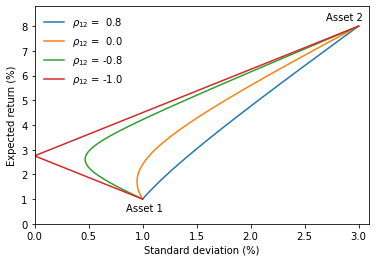

In [ ]:
for idx1, Rho in enumerate(V_Rho):
    plt.plot(np.sqrt(V_Risk[idx1, :]), V_Return[idx1, :], label='$\\rho_{{12}}$ = {:4.1f}'.format(Rho))
plt.xlim(0.0, 3.1)
plt.ylim(0.0, 8.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.text(0.85, 0.5, 'Asset 1')
plt.text(2.7, 8.25, 'Asset 2')
plt.show()

## Investor's Utility Maximization
---

Suppose the investor solves the following utility maximization problem:

$$
 \max_{w_1,\dots,w_n} \mu_P - \gamma\sigma_P^2,
$$

where $\gamma\geqq 0$ is the degree of risk averse. Note that $\mu_P$ and $\sigma_P^2$ are functions of $w_1,\dots,w_n$.

The following cell plots utility functions with different degrees of risk averse ($\gamma=0.0, 1.0, 5.0$). To make comparison easy, the maximul point of each utility function is set equal to zero. In this example, we set $\rho_{12}=0.0$.

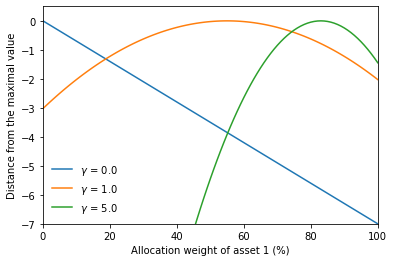

In [ ]:
V_RiskAverse = np.array([0.0, 1.0, 5.0])
for RiskAverse in V_RiskAverse:
    Utility = V_Return[1, :] - RiskAverse * V_Risk[1, :]
    Utility = Utility - np.max(Utility)
    plt.plot(100.0 * V_Weight, Utility, label='$\\gamma$ = {:3.1f}'.format(RiskAverse))
plt.xlim(0.0, 100.0)
plt.ylim(-7.0, 0.5)
plt.xlabel('Allocation weight of asset 1 (%)')
plt.ylabel('Distance from the maximal value')
plt.legend(loc='best', frameon=False)
plt.show()

## Mean-Variance Approach
---

The minimum variance portfolio problem is formulated as follows.

$$
\begin{split}
 \min_{w}\quad & \sigma_P^2=w^{\intercal}\Sigma w, \\
 \text{subject to}\quad
 & \text{(a)}\ w^{\intercal}\mu = \mu_P, \\
 & \text{(b)}\ w^{\intercal}\iota = 1, \\
 & \text{(c)}\ w\geqq 0,
\end{split}
$$

where $\iota$ is a vector whose elements are all equal to one.

## Minimum Variance Frontier with Short Selling
---

In the following cell, the mean vector `Mean`, the covariance matrix `Sigma` are defined. Note that
`Stdev` is a vector of standard deviations and `diag` create a diagonal matrix from a vector. So

```Python
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
```

creates the covariance matrix `Sigma` we need. `@` is the operator for matrix multiplication.

`iota` is a vector whose elements are all equal to one.

In [ ]:
Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       [0.25, 1.00, 0.36, 0.20, 0.20],
                       [0.18, 0.36, 1.00, 0.25, 0.36],
                       [0.10, 0.20, 0.25, 1.00, 0.45],
                       [0.25, 0.20, 0.36, 0.45, 1.00]])
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)
np.set_printoptions(precision=3)
print(Sigma)

[[ 25.     12.5     6.75    7.5    13.75 ]
 [ 12.5   100.     27.     30.     22.   ]
 [  6.75   27.     56.25   28.125  29.7  ]
 [  7.5    30.     28.125 225.     74.25 ]
 [ 13.75   22.     29.7    74.25  121.   ]]


`inv` is a function to compute the inverse of a matrix. Note that in Python `@` is applicable as long as the length of a vector matches the length of the corresponding row/column of a matrix. So we do not need to apply the traspose operator `T` to `Mu` or `iota`.

### CVXPY - Python package for optimization problems

`CVXPY` (https://www.cvxpy.org/index.html) is a Python-embedded modeling language for optimization problems. With `CVXPY`, we can specify an optimization problem in a more accessible way. It utilizes optimization solvers to find a solution of the optimization problem.

+ `Variable()` defines variable(s) in the optimization problem
+ `Parameter()` defines parameter(s) in the optimization problem
+ `quad_form()` compute a quadratic form  $x^{\intercal}Ax$
+ `Minimize()` defines the objective function in the minimization problem
+ `Problem()` specifies the optimization problem as

```IPython
    Problem(Objective Function, [Constraints])
```

The constraints may include equality constraints (e.g., $w^{\intercal}\mu = \mu_P$) and/or inequality constraints (e.g., $w \geqq 0$).

In [ ]:
Weight = cp.Variable(Mu.shape[0])
Target_Return = cp.Parameter()
Risk_Variance = cp.quad_form(Weight, Sigma)
Opt_Portfolio = cp.Problem(cp.Minimize(Risk_Variance),
                           [Weight.T @ Mu == Target_Return,
                            cp.sum(Weight) == 1.0,
                            Weight >= 0.0])

`solve()` finds a solution of the optimization problem specified in the above. You need to choose a solver (`OSQP` in this example).

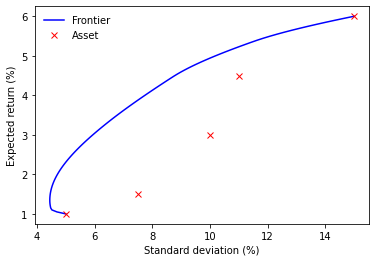

In [ ]:
V_Target = np.linspace(Mu.min(), Mu.max(), num=100)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cp.OSQP)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(V_Risk, V_Target, 'b-')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['Frontier', 'Asset'], loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()

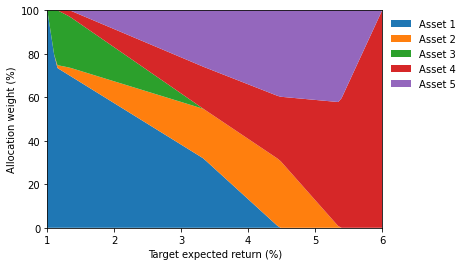

In [ ]:
plt.stackplot(V_Target, V_Weight.T*100)
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xlabel('Target expected return (%)')
plt.ylabel('Allocation weight (%)')
plt.show()

## Minimum Variance Frontier with Short Selling
---

In general no closed-form solution is available for the minimum variance portfolio problem. However, if we drop (c), the solution is given by

$$
 w = 
 \frac{C\mu_P-A}{D}\Sigma^{-1}\mu + \frac{B-A\mu_P}{D}\Sigma^{-1}\iota,
$$

where

$$
 A =\mu^{\intercal}\Sigma^{-1}\iota,\ B=\mu^{\intercal}\Sigma^{-1}\mu,\ 
 C =\iota^{\intercal}\Sigma^{-1}\iota,\ D = B C - A^2.
$$

In [ ]:
inv_Sigma = la.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2

In [ ]:
V_TR = np.linspace(Mu.min(), Mu.max(), num=5)
V_SD = np.zeros(V_TR.shape)
V_W = np.zeros((V_TR.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_TR):
    V_W[idx, :] = (C * Target_Return - A) / D * la.solve(Sigma, Mu) \
                   + (B - A * Target_Return) / D * la.solve(Sigma, iota)
    V_SD[idx] = np.sqrt((C / D) * (Target_Return - A / C) ** 2 + 1.0 / C)
np.set_printoptions(precision=3)
print(np.vstack((V_TR, V_SD, V_W.T * 100)))

[[  1.      2.25    3.5     4.75    6.   ]
 [  4.518   4.935   6.781   9.236  11.929]
 [ 76.371  52.524  28.678   4.831 -19.015]
 [  0.473  12.451  24.429  36.408  48.386]
 [ 27.394  12.709  -1.976 -16.66  -31.345]
 [  0.126  10.426  20.727  31.027  41.328]
 [ -4.363  11.89   28.142  44.394  60.646]]


### Closed-form Expression of the Miminum Variance Frontier

Then we have the following relationship between $\mu_P$ and $\sigma_P$:

$$
 \sigma_P = \sqrt{\frac{C\mu_P^2 - 2A\mu_P + B}{D}}
 = \sqrt{\frac{C}{D}\left(\mu_P-\frac{A}{C}\right)^2+\frac1{C}}.
$$

Therefore the minimum variance frontier is given by

$$
\mu_P = \begin{cases}
\displaystyle
\frac{A + \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P > \frac{A}{C}; \\
& \\
\displaystyle
\frac{A - \sqrt{D(C\sigma_P^2 - 1)}}{C}, & \mu_P < \frac{A}{C}.
\end{cases}
$$

In [ ]:
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C

The upper half of the minimum variance frontier is called the <font color=red>efficient frontier</font> because the expected return is higher on the upper half than the lower half at any given level of the risk (standard deviation). In contrast to the efficient froniter, we refer to the lower half of the minimum variance frontier as the inefficient frontier, though this term is not commonly used in the field of finance.

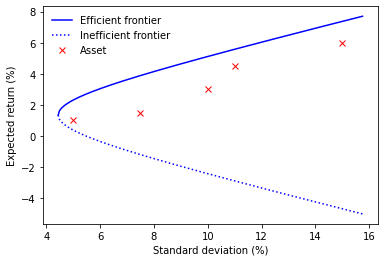

In [ ]:
plt.plot(sigma_p, mu_p_efficient, 'b-', label='Efficient frontier')
plt.plot(sigma_p, mu_p_inefficient, 'b:', label='Inefficient frontier')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx', label='Asset')
plt.legend(loc='best', frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()

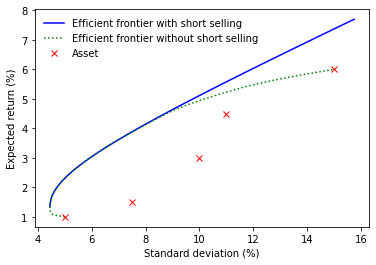

In [ ]:
plt.plot(sigma_p, mu_p_efficient, 'b-', label='Efficient frontier with short selling')
plt.plot(V_Risk, V_Target, 'g:', label='Efficient frontier without short selling')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx', label='Asset')
plt.legend(loc='best',  frameon=False)
plt.xlabel('Standard deviation (%)')
plt.ylabel('Expected return (%)')
plt.show()